<a href="https://colab.research.google.com/github/AshwinAkash24/DL-Regression-Model/blob/main/DL_EX_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Ex. No .01
## Developing a Neural Network Regression Model
## Reg.No: 212223230024
## Name: Ashwin Akash M

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X=torch.linspace(1,50,50).reshape(-1,1)

In [ ]:
torch.manual_seed(45)
e=torch.randint(-8,9,(50,1),dtype=torch.float)

In [ ]:
Y=2*X+1+e

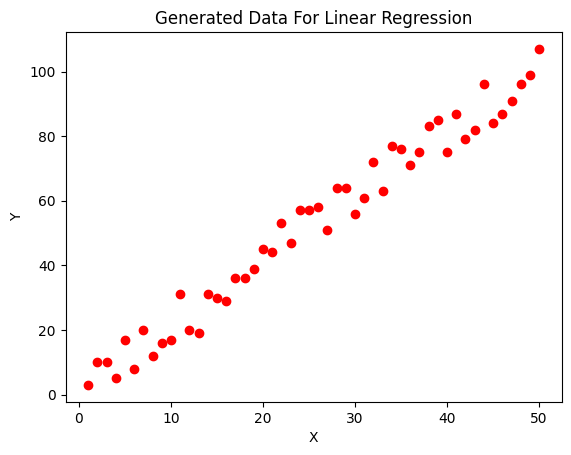

In [ ]:
plt.scatter(X.numpy(),Y.numpy(),color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data For Linear Regression')
plt.show()

In [ ]:
class Model(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.linear=nn.Linear(in_features,out_features)

  def forward(self,x):
    return self.linear(x)

In [ ]:
torch.manual_seed(47)

In [ ]:
model=Model(1,1)

In [ ]:
print(model)

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
print('Weight:',model.linear.weight.item())
print('Bias:',model.linear.bias.item())

Weight: -0.8939048051834106
Bias: -0.9001610279083252


In [ ]:
loss_function=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.0001)

In [ ]:
epochs=50
losses=[]
for epoch in range(1,epochs+1):
  optimizer.zero_grad()
  y_pred=model(X)
  loss=loss_function(y_pred,Y)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()
  print(f"epoch: {epoch:2} loss: {loss.item():10.08f}  weight: {model.linear.weight.item():10.08f}  bias: {model.linear.bias.item():10.08f}")


epoch:  1 loss: 7586.07666016  weight: -0.38437054  bias: -0.88489807
epoch:  2 loss: 5210.77978516  weight: 0.03759884  bias: -0.87223679
epoch:  3 loss: 3581.73120117  weight: 0.38705152  bias: -0.86173010
epoch:  4 loss: 2464.48046875  weight: 0.67644960  bias: -0.85300773
epoch:  5 loss: 1698.23657227  weight: 0.91611356  bias: -0.84576303
epoch:  6 loss: 1172.72338867  weight: 1.11459029  bias: -0.83974206
epoch:  7 loss: 812.31060791  weight: 1.27895784  bias: -0.83473450
epoch:  8 loss: 565.12890625  weight: 1.41507792  bias: -0.83056623
epoch:  9 loss: 395.60418701  weight: 1.52780497  bias: -0.82709301
epoch: 10 loss: 279.33895874  weight: 1.62115908  bias: -0.82419538
epoch: 11 loss: 199.60078430  weight: 1.69846940  bias: -0.82177448
epoch: 12 loss: 144.91394043  weight: 1.76249325  bias: -0.81974834
epoch: 13 loss: 107.40800476  weight: 1.81551385  bias: -0.81804913
epoch: 14 loss: 81.68529510  weight: 1.85942221  bias: -0.81662065
epoch: 15 loss: 64.04379272  weight: 1.895

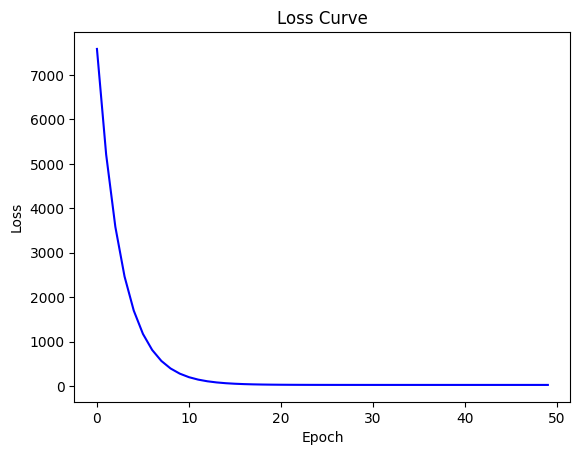

In [ ]:
plt.plot(range(epochs),losses,color="Blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [ ]:
final_weight=model.linear.weight.item()
final_bias=model.linear.bias.item()
print(f"\nFinal Weight : {final_weight:.8f} ,Final Bias: {final_bias}")


Final Weight : 2.07066202 ,Final Bias: -0.8058876395225525


In [ ]:
x1=torch.tensor([X.min().item(),X.max().item()])
y1=x1*final_weight+final_bias

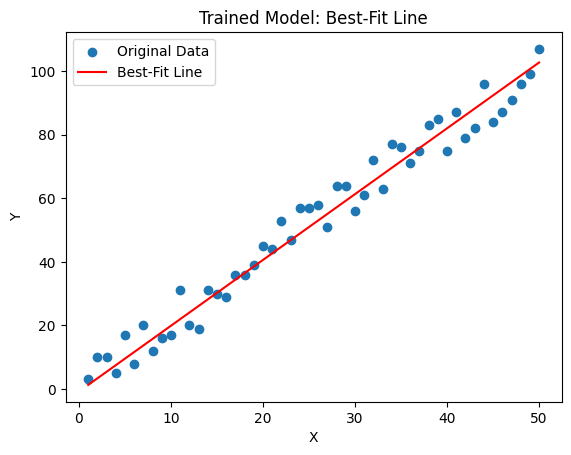

In [ ]:
plt.scatter(X,Y,label='Original Data')
plt.plot(x1,y1,'r',label='Best-Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [ ]:
x_new=torch.tensor([[120.0]])
y_new_pred=model(x_new).item()
print(f"Prediction for x = 120 : {y_new_pred:.8f}")

Prediction for x = 120 : 247.67355347
